# Exploring the Postgres Database

We start by listing some available schemas and tables to get an overview of the database structure.

# Database Overview

The database contains the following schemas and tables (limited to 5 tables per schema):

- *analytics* schema with 1 table: `users`
- *public* schema with no tables

Next, we will inspect the `users` table in the `analytics` schema to understand its structure.

# `analytics.users` Table Structure

The `users` table has the following columns:

- `id`: bigint, primary key
- `email`: text, not nullable
- `full_name`: text, nullable
- `created_at`: timestamp with time zone, not nullable

Next, we will load a limited sample of rows from `analytics.users` to explore the actual data contents.

In [12]:

pg = globals().get("__JAT_PG__")
_sql = "SELECT id, email, full_name, created_at FROM analytics.users ORDER BY created_at DESC LIMIT 50"

df_eb4905 = pg.query_df(sql=_sql, limit=50)
df_eb4905.head(5)
    

,id,email,full_name,created_at
0,1,ada@example.com,Ada Lovelace,2025-09-23 03:29:37.394887+00:00
1,2,grace@example.com,Grace Hopper,2025-09-23 03:29:37.394887+00:00
2,3,linus@example.com,Linus Torvalds,2025-09-23 03:29:37.394887+00:00


# Sample Data Preview

We successfully loaded a small sample of the `analytics.users` table containing 3 rows. Let's now create a couple of simple visualizations using Matplotlib to understand the data better.

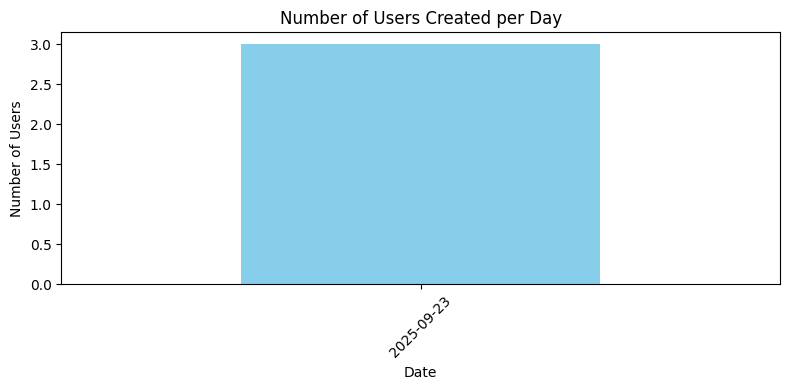

In [15]:
import matplotlib.pyplot as plt

df_eb4905['created_date'] = df_eb4905['created_at'].dt.date

# Count of users created by date (bar chart)
user_counts = df_eb4905.groupby('created_date').size()

plt.figure(figsize=(8, 4))
user_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users Created per Day')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

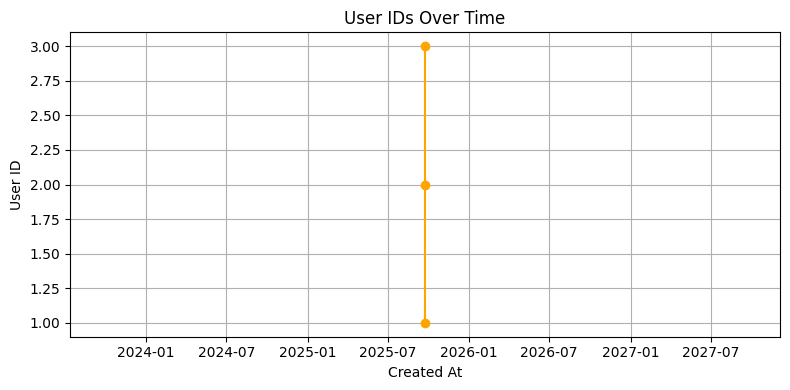

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(df_eb4905['created_at'], df_eb4905['id'], marker='o', linestyle='-', color='orange')
plt.title('User IDs Over Time')
plt.xlabel('Created At')
plt.ylabel('User ID')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary

- We explored the database and found two schemas: `analytics` and `public`, with the `analytics.users` table being a compact and interesting dataset.
- We inspected the columns of `analytics.users` and loaded a sample of recent rows.
- We created two visualizations:
  1. A bar chart showing the count of users created on each unique date.
  2. A line chart tracking user IDs over their creation timestamps.

This exploratory work provides a basic understanding of the users data and shows how timestamps and IDs evolve over time.